# Optimize a portfolio 
* Here we will use the effecient frontier:
    * Expected return and financial risk  are objective for optimization

In [1]:
import datetime
import numpy as np
import pandas as pd
from yahoo_finance_api import YahooFinance as yf
import matplotlib.pyplot as plt

In [2]:
stock_symbols = ['TCS.NS', 'RELIANCE.NS', 'GAIL.NS', 'MARUTI.NS', 'BAJAJ-AUTO.NS', 
                 'ASIANPAINT.NS', 'GSKCONS.NS', 'DIAMINESQ.BO', 'SWISSGLA.BO', 'IOLCP.NS',
                 'CALCOM.BO']

numAssets = len(stock_symbols)
print("We have {} assests in the portfolio.".format(numAssets))

We have 11 assests in the portfolio.


In [3]:
Weights = np.array(np.repeat(1/numAssets,numAssets))
Weights

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

In [4]:
my_stocks = pd.DataFrame()
for i in range(len(stock_symbols)):
    my_stocks[stock_symbols[i]] = yf(stock_symbols[i], result_range='5y', interval='1d', dropna='True').result['Close']
my_stocks

C:\Users\Arjun Janamatti\Anaconda3\envs\tf_nptel\lib\site-packages\yahoo_finance_api-0.0.1-py3.6.egg\yahoo_finance_api\__init__.py:73: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


,TCS.NS,RELIANCE.NS,GAIL.NS,MARUTI.NS,BAJAJ-AUTO.NS,ASIANPAINT.NS,GSKCONS.NS,DIAMINESQ.BO,SWISSGLA.BO,IOLCP.NS,CALCOM.BO
2015-07-17 09:15:00,1282.20,510.85,104.57,4193.00,2529.45,825.40,6459.20,32.05,91.40,92.90,3.13
2015-07-20 09:15:00,1289.57,512.38,104.20,4176.05,2520.95,852.30,6388.15,38.45,91.20,109.55,3.13
2015-07-21 09:15:00,1280.70,503.90,102.66,4152.85,2542.95,816.05,6372.15,38.45,90.35,108.10,3.13
2015-07-22 09:15:00,1264.03,525.20,103.85,4191.15,2618.90,843.30,6368.05,39.70,88.75,109.30,3.15
2015-07-23 09:15:00,1244.30,522.65,104.12,4234.05,2489.05,846.50,6349.95,43.40,87.45,107.25,3.15
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-13 09:15:00,2220.00,1935.00,101.10,5988.85,2900.00,1705.65,10732.60,337.25,873.70,762.65,24.00
2020-07-14 09:15:00,2171.95,1917.00,99.05,5771.75,2899.50,1688.40,10732.60,327.10,838.15,694.50,22.95
2020-07-15 09:15:00,2233.90,1844.00,96.95,5801.30,2942.05,1671.65,10732.60,309.00,826.85,628.05,23.00
2020-07-16 09:15:00,2234.75,1843.40,96.75,5875.35,2942.30,1693.20,10732.60,297.00,840.70,594.90,24.15


### Function to plot individual and combined stocks

In [5]:
# plot individual graphs function
def plot_graphs(my_stocks, ylabel = 'Price in Rupees' ):    
    for i in range(len(my_stocks.columns)):
        my_stocks.iloc[:,i].plot(figsize = (12,10))
        plt.title(my_stocks.columns[i])
        plt.ylabel(ylabel)
        plt.show()

# plot combined stocks graphs function

def combined_plot_graphs(my_stocks):    
    for i in range(len(my_stocks.columns)):
        my_stocks.iloc[:,i].plot(figsize = (12,10))
    plt.title('Portfolio performance of stocks')
    plt.ylabel('closing price in Rupees')
    plt.legend(stock_symbols)
    plt.show()

### Combined stock performance

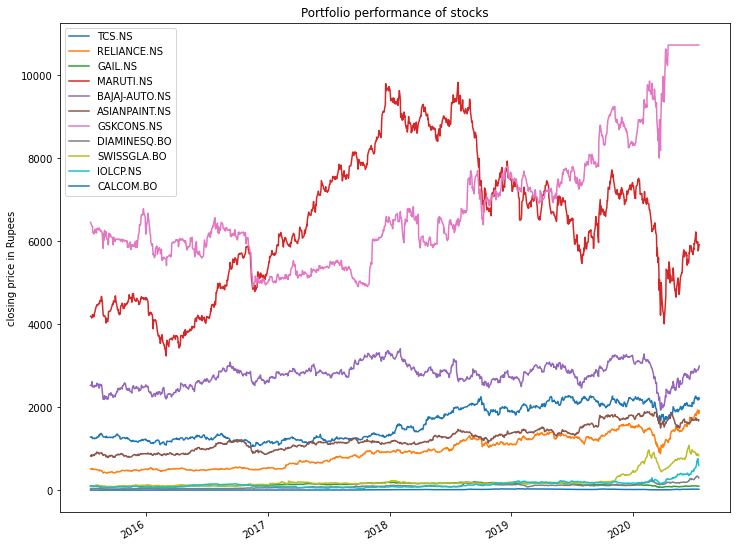

In [6]:
combined_plot_graphs(my_stocks)

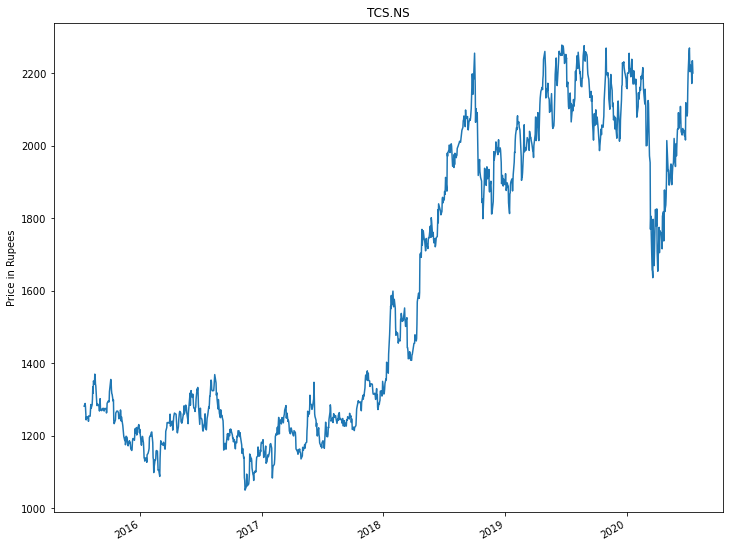

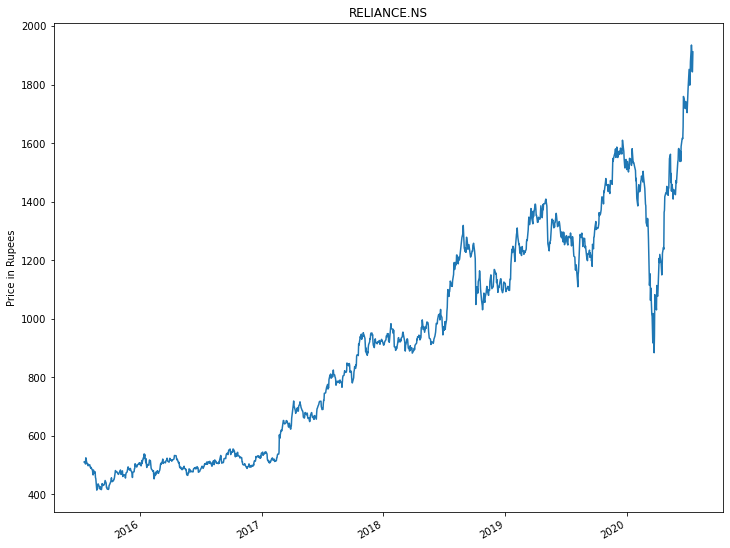

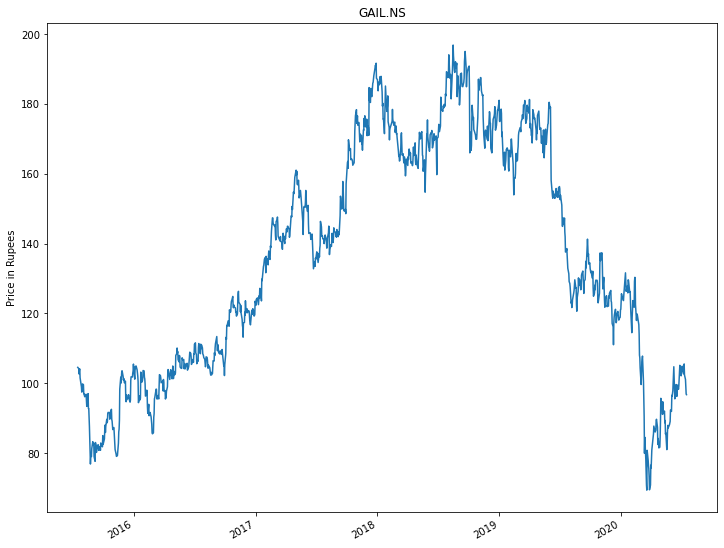

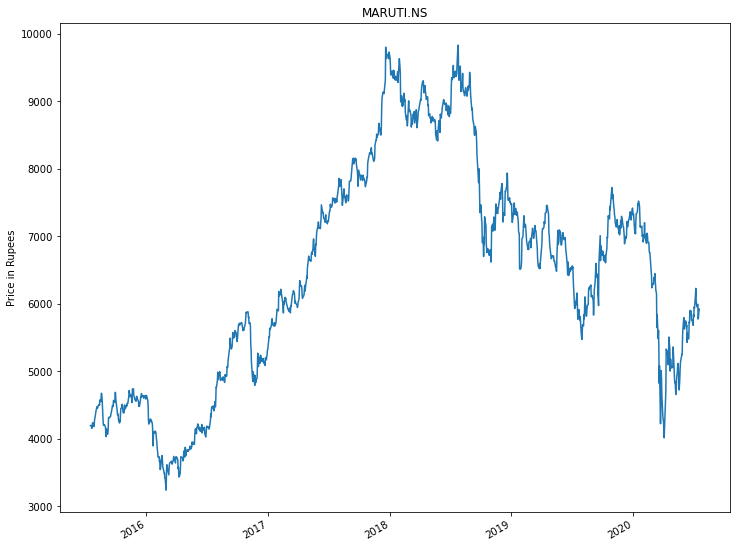

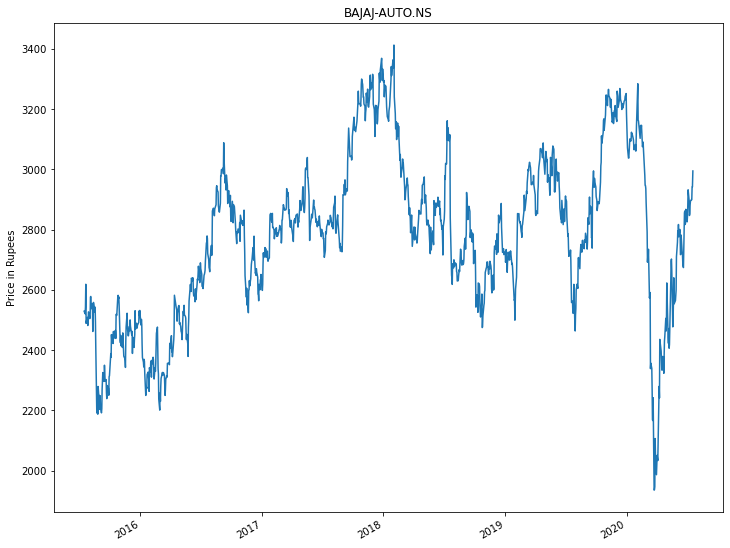

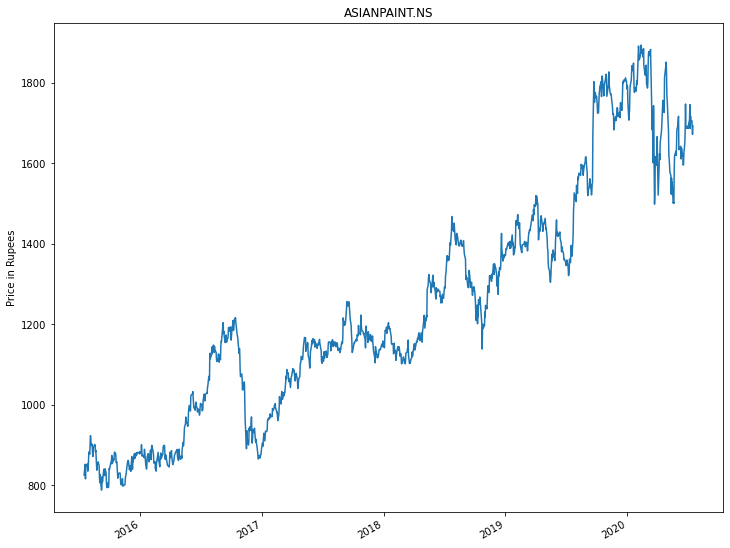

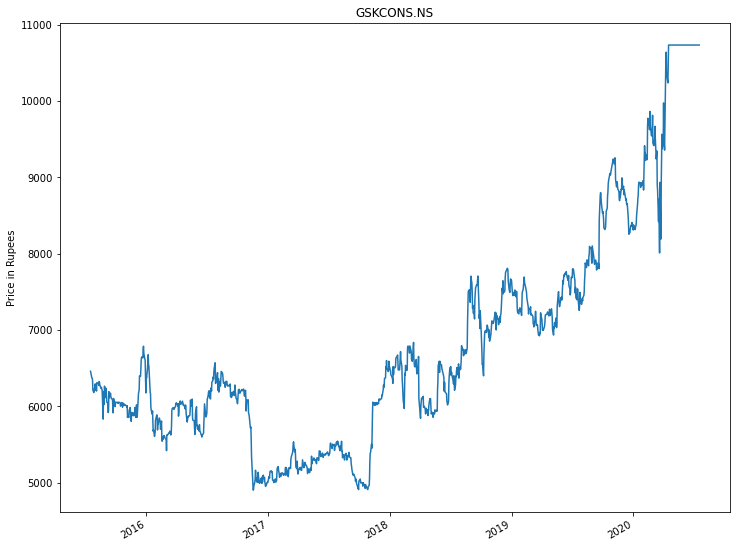

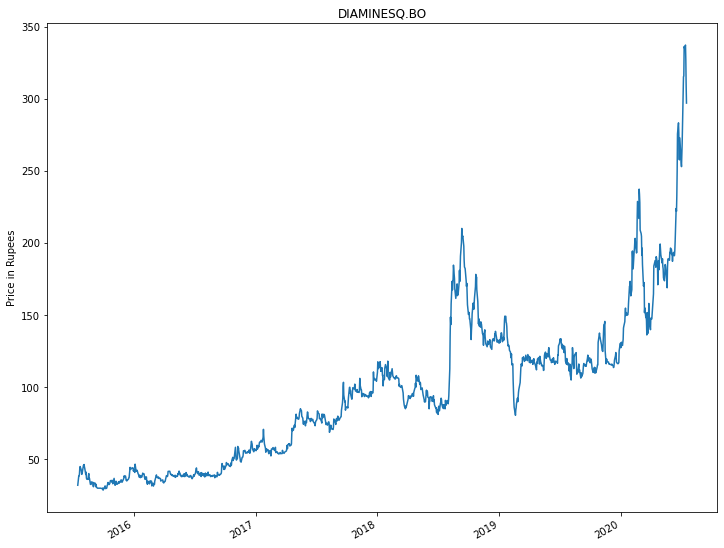

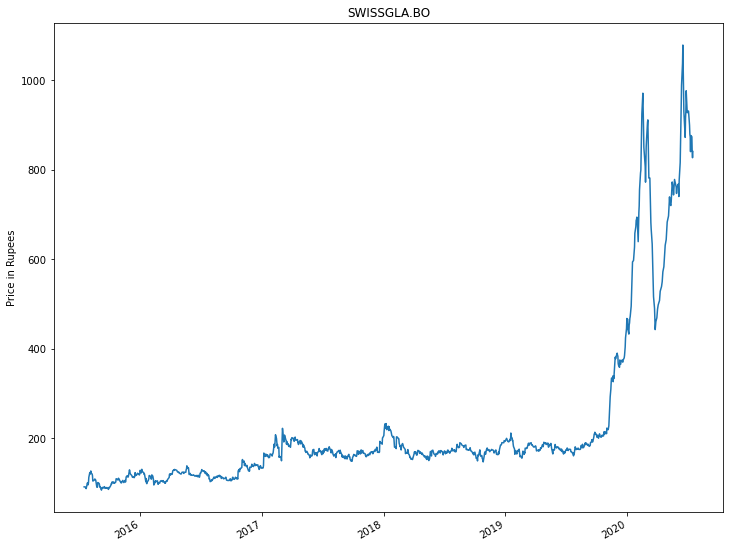

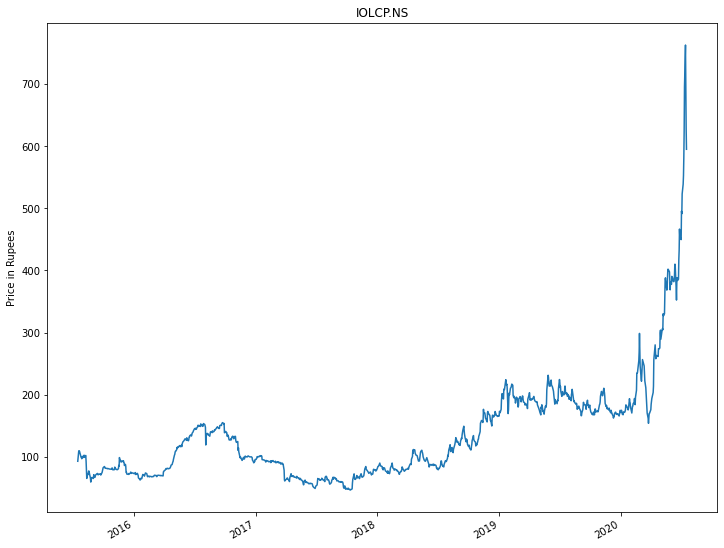

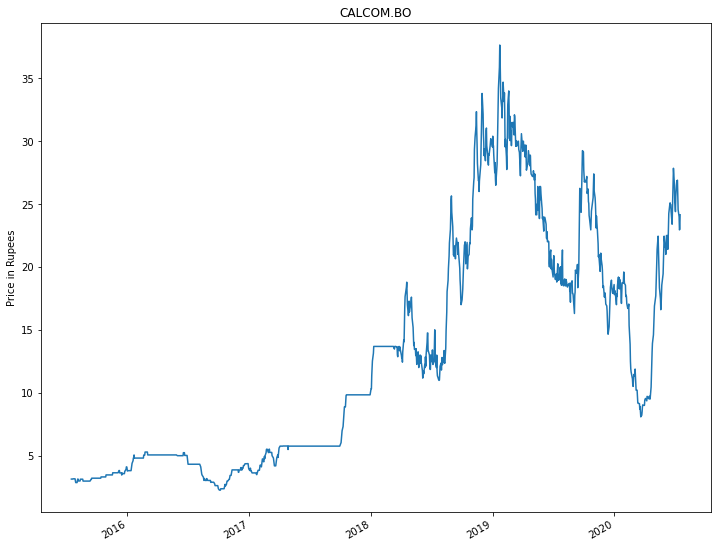

In [7]:
plot_graphs(my_stocks)

### Calculation of simple returns for each of the stocks
* Here the period is set a 1, but if we want monthly stock returns, we can change this number to 30, hence this number can be varied, based on the requirement

In [8]:
# calculate the simple returns 
daily_simple_returns = my_stocks.pct_change(periods=1)
daily_simple_returns

,TCS.NS,RELIANCE.NS,GAIL.NS,MARUTI.NS,BAJAJ-AUTO.NS,ASIANPAINT.NS,GSKCONS.NS,DIAMINESQ.BO,SWISSGLA.BO,IOLCP.NS,CALCOM.BO
2015-07-17 09:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-20 09:15:00,0.005748,0.002995,-0.003538,-0.004042,-0.003360,0.032590,-0.011000,0.199688,-0.002188,0.179225,0.000000
2015-07-21 09:15:00,-0.006878,-0.016550,-0.014779,-0.005555,0.008727,-0.042532,-0.002505,0.000000,-0.009320,-0.013236,0.000000
2015-07-22 09:15:00,-0.013016,0.042270,0.011592,0.009223,0.029867,0.033393,-0.000643,0.032510,-0.017709,0.011101,0.006390
2015-07-23 09:15:00,-0.015609,-0.004855,0.002600,0.010236,-0.049582,0.003795,-0.002842,0.093199,-0.014648,-0.018756,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-13 09:15:00,-0.001057,0.030324,-0.012695,0.005575,0.001831,0.001262,0.000000,0.006566,-0.003024,0.096944,-0.022403
2020-07-14 09:15:00,-0.021644,-0.009302,-0.020277,-0.036251,-0.000172,-0.010113,0.000000,-0.030096,-0.040689,-0.089359,-0.043750
2020-07-15 09:15:00,0.028523,-0.038080,-0.021201,0.005120,0.014675,-0.009921,0.000000,-0.055335,-0.013482,-0.095680,0.002179
2020-07-16 09:15:00,0.000381,-0.000325,-0.002063,0.012764,0.000085,0.012891,0.000000,-0.038835,0.016750,-0.052782,0.050000


In [9]:
# show the corvariance matrix for annualized returns
covariance_matrix = daily_simple_returns.cov() * 252
covariance_matrix

,TCS.NS,RELIANCE.NS,GAIL.NS,MARUTI.NS,BAJAJ-AUTO.NS,ASIANPAINT.NS,GSKCONS.NS,DIAMINESQ.BO,SWISSGLA.BO,IOLCP.NS,CALCOM.BO
TCS.NS,0.064660,0.020331,0.014676,0.019642,0.016412,0.011828,0.013905,0.016668,0.009203,0.010099,-0.000096
RELIANCE.NS,0.020331,0.093649,0.035375,0.040414,0.028786,0.029684,0.020920,0.045269,0.015626,0.033843,0.012913
GAIL.NS,0.014676,0.035375,0.116837,0.028685,0.026169,0.022268,0.014293,0.042156,0.024139,0.027520,0.012966
MARUTI.NS,0.019642,0.040414,0.028685,0.097220,0.041704,0.037334,0.020451,0.048432,0.015399,0.038981,-0.003855
BAJAJ-AUTO.NS,0.016412,0.028786,0.026169,0.041704,0.071453,0.025080,0.015973,0.029851,0.017348,0.029946,0.004414
ASIANPAINT.NS,0.011828,0.029684,0.022268,0.037334,0.025080,0.066053,0.020273,0.026856,0.011078,0.024563,-0.004177
GSKCONS.NS,0.013905,0.020920,0.014293,0.020451,0.015973,0.020273,0.059651,0.020269,0.001850,0.006089,-0.007842
DIAMINESQ.BO,0.016668,0.045269,0.042156,0.048432,0.029851,0.026856,0.020269,0.373725,0.053574,0.087317,0.017395
SWISSGLA.BO,0.009203,0.015626,0.024139,0.015399,0.017348,0.011078,0.001850,0.053574,0.261587,0.045471,0.010063
IOLCP.NS,0.010099,0.033843,0.027520,0.038981,0.029946,0.024563,0.006089,0.087317,0.045471,0.327206,0.003921


* __Covariance__ is direction of relationship between two asset prices.

In [10]:
# portfolio variance

portfolio_variance = np.dot(Weights.T, np.dot(covariance_matrix, Weights))
portfolio_variance

0.03539854279913831

In [11]:
# portfolio volatility or standard deviation
portfolio_volatility = np.sqrt(portfolio_variance)
portfolio_volatility

0.18814500471481646

In [12]:
# Annual portfolio returns
portfolio_simple_annual_return = my_stocks.pct_change(periods=252)
print("Expected return from this portfolio for every year is : {}".format(np.sum(portfolio_simple_annual_return.mean() * Weights)))

Expected return from this portfolio for every year is : 0.3129872766348581


In [13]:
# overall portfolio performance or metrics

variation_percentage = (round(portfolio_variance, 2)) * 100
volatility_percentage = (round(portfolio_volatility, 2)) * 100
annual_return_percentage = (round(np.sum(portfolio_simple_annual_return.mean() * Weights), 2)) * 100

print('Expected annual returns for portfolio: {}%'.format(annual_return_percentage))
print('Expected variance in portfolio: {}%'.format(variation_percentage))
print('Expected volatility in portfolio: {}%'.format(volatility_percentage))

Expected annual returns for portfolio: 31.0%
Expected variance in portfolio: 4.0%
Expected volatility in portfolio: 19.0%


### Portfolio optimization using PyPortfolioOpt

In [14]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [15]:
# expected returns and annualized sample covariance matrix of asset returns

mu = expected_returns.mean_historical_return(my_stocks)
S = risk_models.sample_cov(my_stocks)


### Optimize for maximum sharp ratio
* Sharp ratio is a way to describe the excess returns for the extra amount of volatility, it measures the performance of an investment, compared to an investment which is risk free like treasury bonds


In [16]:
ef = EfficientFrontier(expected_returns = mu,
                       cov_matrix = S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
print()
ef.portfolio_performance(verbose = True)

OrderedDict([('TCS.NS', 0.06718), ('RELIANCE.NS', 0.1669), ('GAIL.NS', 0.0), ('MARUTI.NS', 0.0), ('BAJAJ-AUTO.NS', 0.0), ('ASIANPAINT.NS', 0.06712), ('GSKCONS.NS', 0.10201), ('DIAMINESQ.BO', 0.09911), ('SWISSGLA.BO', 0.18953), ('IOLCP.NS', 0.1058), ('CALCOM.BO', 0.20235)])

Expected annual return: 43.4%
Annual volatility: 22.0%
Sharpe Ratio: 1.88


(0.4340611793396134, 0.2199553714351732, 1.8824781438067695)

* The above results show, that we do not need to have to Maruthi, Bajaj and GAIL in our portfolio, in order to achieve the annual returns of 43.4%

In [17]:
# Discrete allocation of each share per stock

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(my_stocks)
weigths = cleaned_weights
da = DiscreteAllocation(weights,
                        latest_prices,
                        total_portfolio_value = 100000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation: ', allocation)
print('Funds remainig: ', leftover)

Discrete allocation:  {'TCS.NS': 3.0, 'RELIANCE.NS': 9.0, 'ASIANPAINT.NS': 4.0, 'GSKCONS.NS': 1.0, 'DIAMINESQ.BO': 33.0, 'SWISSGLA.BO': 22.0, 'IOLCP.NS': 17.0, 'CALCOM.BO': 838.0}
Funds remainig:  39.649942173215095


* Above data implies that as of today, we can buy 3 shares of TCS, 9 shares of Reliance, 4 shares of Asianpaints, 1 share of GSKCONS, 33 shares of DIAMINESQ, 22 shares of SISSGLA, 17 shares of IOLCP, and 837 shares of CALCOM
* We will have 3.65 rupees leftover approximately after buying stocks with money of 100000 rupees